# Проецируем покемонов

Мы увидим, что проекция — это не только действие полное геометрического смысла! С помощью проекции мы спрогнозируем силу атаки покемона, зная его силу защиты и скорость.

In [35]:
import numpy as np # массивы и математические операции
import pandas as pd # работа с табличками
import seaborn as sns # графики
from sklearn.linear_model import LinearRegression # линейная регрессия
from numpy.linalg import inv # обращение матрицы
from numpy.linalg import solve # решение уравнений

Данные о покемонах взяты с платформы kaggle, [https://www.kaggle.com/rounakbanik/pokemon](https://www.kaggle.com/rounakbanik/pokemon).

Загружаем данные:

In [11]:
poks = pd.read_csv('pokemon.csv')

### Упражнение 0. Немножко осмотритесь по сторонам!

In [8]:
poks.describe().transpose()

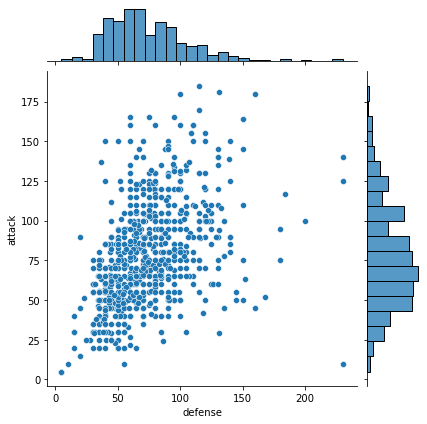

In [67]:
sns.jointplot(data=poks, x='defense', y='attack')

In [ ]:
sns.jointplot(data=poks, x='speed', y='attack')

### Упражнение 1. Проекция по формулам.

В вектор $y$ поместите переменную $attack$, в матрицу $X$ поместите столбик из единиц, а также переменные $defense$ и $speed$. 

Постройте проекцию $\hat{y}$ вектора $y$ на столбцы матрицы $X$ руководствуясь формулой $\hat y = X(X'X)^{-1}X'y$. Условия первого порядка для весов с которыми столбцы $X$ входят в проекцию имеют вид $(X'X)v=X'y$.

Используя формулу проекции, спрогнозируйте силу атаки покемона с защитой $defense=42$ и скоростью $speed=77$.

Проверьте, что разница $y$ и проекции $\hat y$ ортогональна столбцам $X$.


In [38]:
y = poks['attack']
X = poks[['defense', 'speed']]

In [39]:
X.shape

(801, 2)

In [40]:
nobs = X.shape[0]
ones = np.ones((nobs, 1))

In [41]:
X = np.hstack([ones, X])

In [42]:
XtX = X.transpose() @ X
Xty = X.transpose() @ y

In [43]:
XtX

array([[8.010000e+02, 5.848000e+04, 5.313400e+04],
       [5.848000e+04, 5.026944e+06, 3.884892e+06],
       [5.313400e+04, 3.884892e+06, 4.193144e+06]])

In [45]:
v = solve(XtX, Xty)
v

array([16.53312028,  0.48719894,  0.38825567])

In [46]:
v = inv(XtX) @ Xty
v

array([16.53312028,  0.48719894,  0.38825567])

In [51]:
y_hat = X @ v

In [54]:
(y - y_hat) @ poks['defense']
(y - y_hat) @ poks['speed']

-9.433733794139698e-10

In [50]:
new_pok = np.array((1, 42, 77))
new_pok @ v

66.89116213355395

### Упражнение 2. Проекция с помощью боевого инструмента.

Повторите первое упражнение с помощью линейной регрессии. Оцените регрессию $\widehat{attack}_i = \hat\beta_1 + \hat\beta_2 defense_i + \hat\beta_2 speed_i$. Спрогнозируйте силу атаки покемона с защитой $defense=42$ и скоростью $speed=77$.

In [58]:
y = poks['attack']
X = poks[['defense', 'speed']]

In [59]:
reg = LinearRegression() 

In [60]:
fit = reg.fit(X, y)

In [61]:
fit.coef_

array([0.48719894, 0.38825567])

In [62]:
fit.intercept_

16.53312028230583

In [70]:
new_pok = pd.DataFrame({'defense': [42], 'speed': [77]})
new_pok

,defense,speed
0,42,77


In [71]:
new_pok['y_hat'] = fit.predict(new_pok)
new_pok

,defense,speed,y_hat
0,42,77,66.891162


In [65]:
poks['y_hat'] = fit.predict(X)

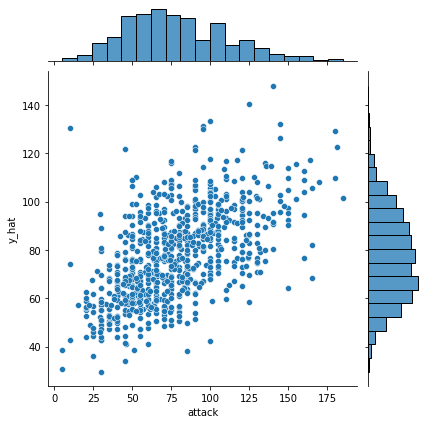

In [66]:
sns.jointplot(data=poks, x='attack', y='y_hat')